# Real-world Data Wrangling

In [ ]:
!python -m pip install kaggle==1.6.12

In [ ]:
!pip install --target=/workspace ucimlrepo

**Note:** Restart the kernel to use updated package(s).

### Import Libraries

In [1]:
import pandas as pd
import requests
import json
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Gather data

### **1.1.** Problem Statement


In this project, we aim to analyze and compare movie data from the TMDb Movie Dataset using ' Api ', IMDb, and  MovieLens Datasets from ' kaggle ' to identify  trends in movie popularity, ratings, and other relevant factors. By combining these datasets, we will uncover insights into what makes a movie successful on different platforms and how various attributes such as type, duration and release year impact a movie’s performance. This analysis will help inform future movie production and distribution strategies for different platforms.

### **1.2.** Gather at least two datasets using two different data gathering methods


#### TMDb Movie Dataset

Type: API

Method: The data was gathered using the "API" method from TMDb Movie source.

Dataset variables:

*  0   adult                 
*  1   backdrop_path      
*  2   id                 
*  3   original_language  
*  4   original_title    
*  5   overview           
*  6   popularity        
*  7   poster_path        
*  8   release_date      
*  9   title              
*  10  video               
*  11  vote_average      
*  12  vote_count       
*  13  genres           

In [2]:
# Gather data
# My TMDb API key
api_key = '21344fff8ada510205c49844634818bd'
response = requests.get(f'https://api.themoviedb.org/3/movie/popular?api_key={api_key}&language=en-US&page=1')
tmdb_data = response.json()['results']

In [3]:
# Convert to DataFrame
tmdb_df = pd.DataFrame(tmdb_data)

In [4]:
# Create the Datasets folder if it does not exist
os.makedirs('./Datasets', exist_ok=True)

# Save DataFrame to the ./Datasets folder
tmdb_df.to_csv('./Datasets/tmdb.csv', index=False)

In [5]:
# Check data
tmdb_df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,"[28, 12, 878]",786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,"[16, 10751, 12, 35]",1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245
2,False,/fqv8v6AycXKsivp1T5yKtLbGXce.jpg,"[878, 12, 28]",653346,en,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,1978.964,/gKkl37BQuKTanygYQG1pyYgLVgf.jpg,2024-05-08,Kingdom of the Planet of the Apes,False,6.868,1286
3,False,/gRApXuxWmO2forYTuTmcz5RaNUV.jpg,"[28, 80, 53, 35]",573435,en,Bad Boys: Ride or Die,"After their late former Captain is framed, Low...",1380.469,/nP6RliHjxsz4irTKsxe8FRhKZYl.jpg,2024-06-05,Bad Boys: Ride or Die,False,7.001,467
4,False,/aATi2PtaOQCVAquCym6OU0Z4FjY.jpg,"[28, 80, 53]",704673,en,Trigger Warning,A Special Forces commando uncovers a dangerous...,1368.307,/6XJM3C47iGOK9nFU6yLFCSf4U5c.jpg,2024-06-20,Trigger Warning,False,5.764,235


####  MovieLens Dataset

Type: CSV File

Method: The data was gathered using the "Downloading files" method from Kaggle source.
- **For this dataset I have a movies.csv file and rating.csv file so at the beginning i should merge them then start work.**

Dataset variables:

 * 0   userId       
*  1   movieId    
*  2   rating   
*  3   timestamp  
*  4   title    
*  5   genres     

In [6]:
# Gather data
movies_df = pd.read_csv("./Datasets/MovieLens/movies.csv")
ratings_df = pd.read_csv("./Datasets/MovieLens/ratings.csv")

In [7]:
# Check movies data
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# Check ratings data
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [9]:
# Merge movies and ratings datasets
movieLens_df = pd.merge(ratings_df, movies_df, on='movieId')

In [10]:
# Check movielens data
movieLens_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


#### IMDb Movies Dataset

Type: CSV File

Method: The data was gathered using the "Downloading files" method from Kaggle source.

Dataset variables:

* 0   Poster_Link   
* 1   Series_Title   
* 2   Released_Year  
* 3   Certificate    
* 4   Runtime        
* 5   IMDB_Rating    
* 6   Overview     
* 7   Meta_score     
* 8   Director  
* 9   Star1        
* 10  Star2       
* 11  Star3          
* 12  Star4         
* 13  No_of_Votes    
* 14  Gross         
* 15  genres 

In [11]:
# Gather data
imdb_df = pd.read_csv("./Datasets/imdb.csv")

In [12]:
# Check imdb data
imdb_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


***
**____________________________________________________________________________________________________________________________**
***

## 2. Assess data

### Quality Issue 1: Completeness
#### - We'll now take a look at the completeness of the three datasets, specifically analyzing any missing or incomplete values.
* Visually: Display a sample of the dataset and inspect for NaN values.
* Programmatically: Use isnull().sum() to count the number of missing values in each column.
#### - Handle genres for all Datasets **BUT HERE I SHOULD HANDLE GENRES INSTEAD IN CLEANING STAGE **

#### First I will start with TMDB dataset

In [13]:
# Check visually
tmdb_df.sample(5, random_state=2)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
12,False,/6XjMwQTvnICBz6TguiDKkDVHvgS.jpg,"[27, 878, 53]",762441,en,A Quiet Place: Day One,As New York City is invaded by alien creatures...,1017.190,/yrpPYKijwdMHyTGIOd1iK1h0Xno.jpg,2024-06-26,A Quiet Place: Day One,False,7.027,202
4,False,/aATi2PtaOQCVAquCym6OU0Z4FjY.jpg,"[28, 80, 53]",704673,en,Trigger Warning,A Special Forces commando uncovers a dangerous...,1368.307,/6XJM3C47iGOK9nFU6yLFCSf4U5c.jpg,2024-06-20,Trigger Warning,False,5.764,235
18,False,/g5Ha2DhXIuxsUl4gaDnbw3jOAlo.jpg,[28],1115623,en,The Last Kumite,When Karate champion Michael Rivers wins the l...,659.985,/zDkaJgsPoSqa2cMe2hW2HAfyWwO.jpg,2024-05-09,The Last Kumite,False,7.200,57
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,"[28, 12, 878]",786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637
9,False,/iTWrsOVsUqcwYSxrpINNs3hG2nC.jpg,"[53, 27, 28, 9648]",1001311,fr,Sous la Seine,"In the Summer of 2024, Paris is hosting the Wo...",1076.567,/qZPLK5ktRKa3CL4sKRZtj8UlPYc.jpg,2024-06-05,Under Paris,False,6.028,800


Here as we see there isn't missing values, but lets check programmatically

In [14]:
# Check TMDB programmatically
tmdb_df.isnull().sum()

adult                0
backdrop_path        0
genre_ids            0
id                   0
original_language    0
original_title       0
overview             0
popularity           0
poster_path          0
release_date         0
title                0
video                0
vote_average         0
vote_count           0
dtype: int64

**TMDB hasn't missing values**

***

#### Second I will check movielens dataset

In [15]:
# Check visually
movieLens_df.sample(5, random_state=2)

,userId,movieId,rating,timestamp,title,genres
52603,228,4025,3.5,1125607852,Miss Congeniality (2000),Comedy|Crime
82298,299,60756,3.0,1290572605,Step Brothers (2008),Comedy
91193,128,131258,2.5,1427745392,The Pirates (2014),Adventure
8523,262,1270,3.0,1183002070,Back to the Future (1985),Adventure|Comedy|Sci-Fi
73072,380,2296,4.0,1020279706,"Night at the Roxbury, A (1998)",Comedy


And here there isn't missing values but lets ensure programmatically

In [16]:
# Check programmatically
movieLens_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

**So, yes there is no missing values here**

***

#### Third I will check the last dataset IMDB

In [17]:
# Check visullay
imdb_df.sample(5, random_state=2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
37,https://m.media-amazon.com/images/M/MV5BMTI1MT...,The Departed,2006,A,151 min,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,85.0,Martin Scorsese,Leonardo DiCaprio,Matt Damon,Jack Nicholson,Mark Wahlberg,1189773,"132,384,315"
726,https://m.media-amazon.com/images/M/MV5BMjE0ND...,En man som heter Ove,2015,PG-13,116 min,"Comedy, Drama, Romance",7.7,"Ove, an ill-tempered, isolated retiree who spe...",70.0,Hannes Holm,Rolf Lassgård,Bahar Pars,Filip Berg,Ida Engvoll,47444,"3,358,518"
846,https://m.media-amazon.com/images/M/MV5BMTYxMD...,Love and Death,1975,PG,85 min,"Comedy, War",7.7,"In czarist Russia, a neurotic soldier and his ...",89.0,Woody Allen,Woody Allen,Diane Keaton,Georges Adet,Frank Adu,36037,NaN
295,https://m.media-amazon.com/images/M/MV5BMGEyNz...,The Man Who Shot Liberty Valance,1962,NaN,123 min,"Drama, Western",8.1,A senator returns to a western town for the fu...,94.0,John Ford,James Stewart,John Wayne,Vera Miles,Lee Marvin,68827,NaN
924,https://m.media-amazon.com/images/M/MV5BMTI5Mj...,Huo Yuan Jia,2006,PG-13,104 min,"Action, Biography, Drama",7.6,A biography of Chinese Martial Arts Master Huo...,70.0,Ronny Yu,Jet Li,Li Sun,Yong Dong,Yun Qu,72863,"24,633,730"


Yes, here with random rows there is missing values here lets check programmatically

In [18]:
# Check programmatically
imdb_df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

**and here as we see there is missing values on Certificate, Meta_score and Gross**
#### **Handle Genres**

#### First thing , I will handle TMDB genres 

In [19]:
tmdb_df.head(3)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,"[28, 12, 878]",786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,"[16, 10751, 12, 35]",1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245
2,False,/fqv8v6AycXKsivp1T5yKtLbGXce.jpg,"[878, 12, 28]",653346,en,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,1978.964,/gKkl37BQuKTanygYQG1pyYgLVgf.jpg,2024-05-08,Kingdom of the Planet of the Apes,False,6.868,1286


Here there is just genres_Id so i must fetch genres ApI first and then split ids and explode it 

In [20]:
# Step 1: Fetch genres information
genres_response = requests.get(f'https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}&language=en-US')
genres_data = genres_response.json()['genres']
genres_dict = {genre['id']: genre['name'] for genre in genres_data}

In [21]:
# Step 2: Convert genre IDs to genre names
def map_genId_to_genName(genre_ids):
    genre_names =[]
    for genre_id in genre_ids:
        genre_names.append(genres_dict[genre_id])
    return genre_names

tmdb_df['genres'] = tmdb_df['genre_ids'].apply(map_genId_to_genName)

In [22]:
# Step 3: Split and explode genre IDs
tmdb_df_exploded = tmdb_df.explode('genres')

In [23]:
# Step 4: Drop 'genre_ids' column 
tmdb_df_exploded = tmdb_df_exploded.drop(columns=['genre_ids'])

In [24]:
# Step 5: Check and display data
tmdb_df_exploded.head(6)

,adult,backdrop_path,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Action
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Adventure
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Science Fiction
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Animation
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Family
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Adventure


**DATA IS READY**
***

#### Second: MovieLens dataset

In [25]:
# Step 1: Split the genres by '|'
movieLens_df['genres'] = movieLens_df['genres'].str.split('|')

In [26]:
# Step 2: Explode the genres into separate rows
movieLens_df_exploded = movieLens_df.explode('genres')

In [27]:
# Step 3: Check and display data
movieLens_df_exploded.head(6)

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime
0,1,16,4.0,1217897793,Casino (1995),Drama
1,9,16,4.0,842686699,Casino (1995),Crime
1,9,16,4.0,842686699,Casino (1995),Drama
2,12,16,1.5,1144396284,Casino (1995),Crime
2,12,16,1.5,1144396284,Casino (1995),Drama


**DATA IS READY**
***

#### Third IMDB dataset

In [28]:
# Step 1: Split the genres by '|'
imdb_df['genres'] = imdb_df['Genre'].str.split(',')

In [29]:
# Step 2: Explode the genres into separate rows
imdb_df_exploded = imdb_df.explode('genres')

In [30]:
# Step 3: Drop 'Genre' column 
imdb_df_exploded = imdb_df_exploded.drop(columns=['Genre'])

In [31]:
# Step 4: Check and display data
imdb_df_exploded.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genres
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Crime
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Drama
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Action
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Crime


**DATA IS READY**
***

### Quality Issue 2: Accuracy: I will solve it here for necessary
* check year in MovieLens 
* check date for quality in TMDB

**TMDB**

In [32]:
# Check visually
tmdb_df_exploded.head()

,adult,backdrop_path,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Action
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Adventure
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Science Fiction
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Animation
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Family


i must extract it as we show

In [33]:
# Convert 'release_date' to datetime
tmdb_df_exploded['release_date'] = pd.to_datetime(tmdb_df_exploded['release_date'], format='%Y-%m-%d', errors='coerce')

# Check the data type after conversion
print(tmdb_df_exploded['release_date'].dtype)

datetime64[ns]


In [34]:
# Extract the year and create a new column 'released_year' using .loc
tmdb_df_exploded.loc[:, 'released_year'] = tmdb_df_exploded['release_date'].dt.year

In [35]:
# Check Correctly
tmdb_df_exploded.head()

,adult,backdrop_path,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,released_year
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Action,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Adventure,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Science Fiction,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Animation,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Family,2024


**MovieLens**

In [36]:
# Check visually
movieLens_df_exploded.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime
0,1,16,4.0,1217897793,Casino (1995),Drama
1,9,16,4.0,842686699,Casino (1995),Crime
1,9,16,4.0,842686699,Casino (1995),Drama
2,12,16,1.5,1144396284,Casino (1995),Crime


so here i should extract year from title 


In [37]:
# Extract year by splitting and accessing the last element
movieLens_df_exploded['released_year'] = movieLens_df_exploded['title'].str.split().str[-1]

# Remove the year from the 'title' column
movieLens_df_exploded['title'] = movieLens_df_exploded['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

# Remove parentheses around the extracted year
movieLens_df_exploded['released_year'] = movieLens_df_exploded['released_year'].str.strip('()')

In [38]:
# Validate if clean success
movieLens_df_exploded.head()

,userId,movieId,rating,timestamp,title,genres,released_year
0,1,16,4.0,1217897793,Casino,Crime,1995
0,1,16,4.0,1217897793,Casino,Drama,1995
1,9,16,4.0,842686699,Casino,Crime,1995
1,9,16,4.0,842686699,Casino,Drama,1995
2,12,16,1.5,1144396284,Casino,Crime,1995


sucess

***

### Quality Issue 3: Consistency: 
#### - Inconsistent Rating Scale
* Visually: Display a sample of the ratings column and inspect the range of values.
* Programmatically: Use describe() to summarize the statistics of the ratings column.
#### - Rename columns to standardize them or make them more descriptive.
* Visually: Check the column names to ensure they are descriptive.
* Programmatically: Print the column names and check if any look like they should be values.
#### - Delete unnessesary  columns

#### First start with Inconsistent Rating Scale with TMDB dataset 

In [39]:
# Check visually
tmdb_df_exploded['vote_average'].head(10)

0    7.715
0    7.715
0    7.715
1    7.710
1    7.710
1    7.710
1    7.710
2    6.868
2    6.868
2    6.868
Name: vote_average, dtype: float64

So, here vote_average scale between 0-10, lets ensure programmatically

In [40]:
#Check programmatically
tmdb_df_exploded['vote_average'].describe()

count    65.000000
mean      7.041554
std       0.716058
min       5.611000
25%       6.553000
50%       7.027000
75%       7.391000
max       8.471000
Name: vote_average, dtype: float64

**Scale between 0-10**

***

In [41]:
# Check visually
movieLens_df_exploded['rating'].head(10)

0    4.0
0    4.0
1    4.0
1    4.0
2    1.5
2    1.5
3    4.0
3    4.0
4    3.0
4    3.0
Name: rating, dtype: float64

Scale here from 0-5, lets ensure

In [42]:
#Check programmatically
movieLens_df_exploded['rating'].describe()

count    281904.000000
mean          3.530353
std           1.039671
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

**So in the next stage i should douple the scale**

***

In [43]:
# Check visually
imdb_df_exploded['IMDB_Rating'].head(10)

0    9.3
1    9.2
1    9.2
2    9.0
2    9.0
2    9.0
3    9.0
3    9.0
4    9.0
4    9.0
Name: IMDB_Rating, dtype: float64

Rating here from 0-10 , lets ensure

In [44]:
#Check programmatically
imdb_df_exploded['IMDB_Rating'].describe()

count    2541.000000
mean        7.944904
std         0.272106
min         7.600000
25%         7.700000
50%         7.900000
75%         8.100000
max         9.300000
Name: IMDB_Rating, dtype: float64

**Yes rating here from 0-10, no need to change**

#### Rename Columns

**TMDB**

In [45]:
# Check visually 
tmdb_df_exploded.head()

,adult,backdrop_path,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,released_year
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Action,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Adventure,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Science Fiction,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Animation,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Family,2024


In [46]:
# Check programmatically
tmdb_df_exploded.columns

Index(['adult', 'backdrop_path', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'release_date', 'title',
       'video', 'vote_average', 'vote_count', 'genres', 'released_year'],
      dtype='object')

* **vote_average must be rename to rating**

**IMDB**

In [47]:
# Check visually
imdb_df_exploded.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genres
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Crime
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Drama
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Action
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Crime


In [48]:
# Check programmatically
imdb_df_exploded.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'genres'],
      dtype='object')

**Series_Title ,IMDB_Rating and Released_Year should rename as title, rating, released_year**

#### Delete Unnecessary columns

In [49]:
# Check visually 
tmdb_df_exploded.head()

,adult,backdrop_path,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,released_year
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Action,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Adventure,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Science Fiction,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Animation,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Family,2024


In [50]:
# Check programmatically
tmdb_df_exploded.columns

Index(['adult', 'backdrop_path', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'release_date', 'title',
       'video', 'vote_average', 'vote_count', 'genres', 'released_year'],
      dtype='object')

here i just need columns ['title', 'release_date', 'vote_average', 'genres']

#### Second MovieLens dataset

In [51]:
# Check visually
movieLens_df_exploded.head()

,userId,movieId,rating,timestamp,title,genres,released_year
0,1,16,4.0,1217897793,Casino,Crime,1995
0,1,16,4.0,1217897793,Casino,Drama,1995
1,9,16,4.0,842686699,Casino,Crime,1995
1,9,16,4.0,842686699,Casino,Drama,1995
2,12,16,1.5,1144396284,Casino,Crime,1995


In [52]:
# Check programmatically
movieLens_df_exploded.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres',
       'released_year'],
      dtype='object')

* delete userId ,timestamp and movieId

#### Third IMDB dataset

In [53]:
# Check visually
imdb_df_exploded.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genres
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Crime
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Drama
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Action
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Crime


In [54]:
# Check programmatically
imdb_df_exploded.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'genres'],
      dtype='object')

Here I just need : ['Series_Title', 'Released_Year','IMDB_Rating','genres']

***

### Quality Issue 4: Uniqueness - Duplicated
* Visually: Display a sample of the dataset and manually check for duplicate rows.
* Programmatically: Use duplicated().sum() to count the number of duplicate rows.


#### First start with TMDB dataset

In [55]:
# Check visually
tmdb_df_exploded.head(10)

,adult,backdrop_path,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,released_year
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Action,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Adventure,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Science Fiction,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Animation,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Family,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Adventure,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Comedy,2024
2,False,/fqv8v6AycXKsivp1T5yKtLbGXce.jpg,653346,en,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,1978.964,/gKkl37BQuKTanygYQG1pyYgLVgf.jpg,2024-05-08,Kingdom of the Planet of the Apes,False,6.868,1286,Science Fiction,2024
2,False,/fqv8v6AycXKsivp1T5yKtLbGXce.jpg,653346,en,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,1978.964,/gKkl37BQuKTanygYQG1pyYgLVgf.jpg,2024-05-08,Kingdom of the Planet of the Apes,False,6.868,1286,Adventure,2024
2,False,/fqv8v6AycXKsivp1T5yKtLbGXce.jpg,653346,en,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,1978.964,/gKkl37BQuKTanygYQG1pyYgLVgf.jpg,2024-05-08,Kingdom of the Planet of the Apes,False,6.868,1286,Action,2024


As we show there is no duplicates here

In [56]:
# Check Programmatically
tmdb_df_exploded.duplicated(subset= ['original_title']).sum()

45

**0 so there is no duplicates**

***

#### Second MovieLens dataset

In [57]:
# Check visually
movieLens_df_exploded.head(10)

,userId,movieId,rating,timestamp,title,genres,released_year
0,1,16,4.0,1217897793,Casino,Crime,1995
0,1,16,4.0,1217897793,Casino,Drama,1995
1,9,16,4.0,842686699,Casino,Crime,1995
1,9,16,4.0,842686699,Casino,Drama,1995
2,12,16,1.5,1144396284,Casino,Crime,1995
2,12,16,1.5,1144396284,Casino,Drama,1995
3,24,16,4.0,963468757,Casino,Crime,1995
3,24,16,4.0,963468757,Casino,Drama,1995
4,29,16,3.0,836820223,Casino,Crime,1995
4,29,16,3.0,836820223,Casino,Drama,1995


As we show there is no duplicates here

In [58]:
# Check Programmatically
movieLens_df_exploded.duplicated(subset=['title', 'movieId', 'userId']).sum()

176565

0 so there is no duplicates

***

#### Third IMDB dataset

In [59]:
# Check visually
imdb_df_exploded.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genres
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Crime
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Drama
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Action
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Crime
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Drama
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Crime
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Drama
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Crime
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Drama


As we show there is no duplicates here

In [60]:
# Check Programmatically
imdb_df_exploded.duplicated(subset=['Series_Title', 'Director']).sum()

1541

0 so there is no duplicates

***

### Quality Issue 5: Validity - Check Incorrect Data Types


#### First TMDB dataset

In [61]:
# Check datatypes
tmdb_df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 19
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   adult              65 non-null     bool          
 1   backdrop_path      65 non-null     object        
 2   id                 65 non-null     int64         
 3   original_language  65 non-null     object        
 4   original_title     65 non-null     object        
 5   overview           65 non-null     object        
 6   popularity         65 non-null     float64       
 7   poster_path        65 non-null     object        
 8   release_date       65 non-null     datetime64[ns]
 9   title              65 non-null     object        
 10  video              65 non-null     bool          
 11  vote_average       65 non-null     float64       
 12  vote_count         65 non-null     int64         
 13  genres             65 non-null     object        
 14  released_year    

In [62]:
tmdb_df_exploded.nunique()

adult                 1
backdrop_path        20
id                   20
original_language     5
original_title       20
overview             20
popularity           20
poster_path          20
release_date         16
title                20
video                 1
vote_average         20
vote_count           20
genres               13
released_year         3
dtype: int64

In [63]:
tmdb_df_exploded.describe()

,id,popularity,release_date,vote_average,vote_count,released_year
count,6.500000e+01,65.000000,65,65.000000,65.000000,65.000000
mean,8.003676e+05,1442.611262,2023-08-01 07:00:55.384615424,7.041554,2415.415385,2023.200000
min,1.505400e+05,589.670000,2015-06-17 00:00:00,5.611000,28.000000,2015.000000
25%,6.397200e+05,768.435000,2024-03-02 00:00:00,6.553000,235.000000,2024.000000
50%,8.234640e+05,1086.920000,2024-05-09 00:00:00,7.027000,518.000000,2024.000000
75%,1.011985e+06,1368.307000,2024-06-06 00:00:00,7.391000,1637.000000,2024.000000
max,1.143019e+06,4806.719000,2024-06-26 00:00:00,8.471000,21019.000000,2024.000000
std,2.646523e+05,1162.250895,NaN,0.716058,5471.761111,2.405722


**Must convert:-**
* backdrop_path -> String ~ Deleted
* original_title -> String ~ Deleted
* original_language -> category ~ Deleted
* overview -> String ~ Deleted
* popularity -> int16 ~ Deleted
* poster_path -> String ~ Deleted
* title -> String
* vote_average -> int8
* vote_count -> int16 ~ Deleted
* genres -> category 

***
#### Movielens dataset

In [64]:
movieLens_df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281904 entries, 0 to 105338
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   userId         281904 non-null  int64  
 1   movieId        281904 non-null  int64  
 2   rating         281904 non-null  float64
 3   timestamp      281904 non-null  int64  
 4   title          281904 non-null  object 
 5   genres         281904 non-null  object 
 6   released_year  281904 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 17.2+ MB


In [65]:
movieLens_df_exploded.nunique()

userId             668
movieId          10325
rating              10
timestamp        84686
title            10007
genres              20
released_year      101
dtype: int64

In [66]:
movieLens_df_exploded.describe()

,userId,movieId,rating,timestamp
count,281904.000000,281904.000000,281904.000000,2.819040e+05
mean,361.282380,14145.495626,3.530353,1.138102e+09
std,196.264625,26647.297178,1.039671,1.817972e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1041.000000,3.000000,9.747113e+08
50%,377.000000,2529.000000,3.500000,1.130272e+09
75%,545.000000,6537.000000,4.000000,1.280807e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


**Must convert:-**
* title -> String
* rating -> int8
* genres -> category

***
#### Third IMDB dataset

In [67]:
imdb_df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2541 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    2541 non-null   object 
 1   Series_Title   2541 non-null   object 
 2   Released_Year  2541 non-null   object 
 3   Certificate    2306 non-null   object 
 4   Runtime        2541 non-null   object 
 5   IMDB_Rating    2541 non-null   float64
 6   Overview       2541 non-null   object 
 7   Meta_score     2146 non-null   float64
 8   Director       2541 non-null   object 
 9   Star1          2541 non-null   object 
 10  Star2          2541 non-null   object 
 11  Star3          2541 non-null   object 
 12  Star4          2541 non-null   object 
 13  No_of_Votes    2541 non-null   int64  
 14  Gross          2109 non-null   object 
 15  genres         2541 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 337.5+ KB


In [68]:
imdb_df_exploded.nunique()

Poster_Link      1000
Series_Title      999
Released_Year     100
Certificate        16
Runtime           140
IMDB_Rating        17
Overview         1000
Meta_score         63
Director          548
Star1             660
Star2             841
Star3             891
Star4             939
No_of_Votes       999
Gross             823
genres             34
dtype: int64

In [69]:
imdb_df_exploded.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,2541.000000,2146.000000,2.541000e+03
mean,7.944904,77.758155,2.785272e+05
std,0.272106,12.360541,3.231904e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.742800e+04
50%,7.900000,79.000000,1.435250e+05
75%,8.100000,87.000000,3.880890e+05
max,9.300000,100.000000,2.343110e+06


**Must vonvert:-**
* Poster_Link  -> String ~ Deleted
* Series_Title  -> String
* IMDB_Rating  -> int8
* Overview   -> String ~ Deleted
* Meta_score  -> int8 ~ Deleted
* Director    -> String ~ Deleted
* Star1       -> String ~ Deleted
* Star2       -> String ~ Deleted
* Star3       -> String ~ Deleted
* Star4       -> String ~ Deleted
* No_of_Votes   -> int8 ~ Deleted
* genres       -> Category

***

### Tidiness Issue 1: Column Headers as Values 
* Visually: Check the column names to ensure they are descriptive.
* Programmatically: Print the column names and check if any look like they should be values.

In [70]:
# Check visually 
tmdb_df_exploded.head()

,adult,backdrop_path,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,released_year
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Action,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Adventure,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Science Fiction,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Animation,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Family,2024


Column not values here

In [71]:
# Check programmatically
tmdb_df_exploded.columns

Index(['adult', 'backdrop_path', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'release_date', 'title',
       'video', 'vote_average', 'vote_count', 'genres', 'released_year'],
      dtype='object')

* yes column name is Tidy not values

***

#### Second MovieLens dataset

In [72]:
# Check visually
movieLens_df_exploded.head()

,userId,movieId,rating,timestamp,title,genres,released_year
0,1,16,4.0,1217897793,Casino,Crime,1995
0,1,16,4.0,1217897793,Casino,Drama,1995
1,9,16,4.0,842686699,Casino,Crime,1995
1,9,16,4.0,842686699,Casino,Drama,1995
2,12,16,1.5,1144396284,Casino,Crime,1995


Column Not Values

In [73]:
# Check programmatically
movieLens_df_exploded.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres',
       'released_year'],
      dtype='object')

**Column is Tidy** 

***

#### Third IMDB dataset

In [74]:
# Check visually
imdb_df_exploded.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genres
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Crime
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Drama
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Action
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Crime


Column not values

In [75]:
# Check programmatically
imdb_df_exploded.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'genres'],
      dtype='object')

* **Column right and Tidy**

***

### Tidiness issue 2: Each cell is a single value
In movieLens dataset there is a row with to values so we must find it 


In [76]:
# Check visually
movieLens_df_exploded.head()

,userId,movieId,rating,timestamp,title,genres,released_year
0,1,16,4.0,1217897793,Casino,Crime,1995
0,1,16,4.0,1217897793,Casino,Drama,1995
1,9,16,4.0,842686699,Casino,Crime,1995
1,9,16,4.0,842686699,Casino,Drama,1995
2,12,16,1.5,1144396284,Casino,Crime,1995


In [77]:
#Check programmatically
# Function to check the released_year column
def check_year(year):
    if pd.isnull(year) or year == '':
        return []
    
    year = str(year)
    if '-' in year:
        years = year.split('-')
        return list(range(int(years[0]), int(years[1]) + 1))
    elif ',' in year:
        return [int(y.strip()) for y in year.split(',')]
    else:
        return [int(year)]
    

In [78]:
# Apply the function to the released_year column
year = movieLens_df_exploded['released_year'].apply(check_year)
year

0         [1995]
0         [1995]
1         [1995]
1         [1995]
2         [1995]
           ...  
105335    [2015]
105335    [2015]
105336    [2014]
105337    [2015]
105338    [2015]
Name: released_year, Length: 281904, dtype: object

Unique 

***
**____________________________________________________________________________________________________________________________**
***

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

#### Make copies

In [79]:
# TMDB dataset
tmdb_clean = tmdb_df_exploded.copy()
# MovieLens dataset
movieLens_clean = movieLens_df_exploded.copy()
# IMDB dataset
imdb_clean = imdb_df_exploded.copy()

### **Quality Issue 1:  Completeness**
here in my datasets:
* TMDB : no missing value
* MovieLens : no missing value
* IMDB : have missing value

In [80]:
# I can drop na for IMDB dataset but i notice that the column that have missing values i don't need it on my data
# so i will use drop column method for "Certificate, Meta_score and Gross columns"
imdb_clean.drop(['Certificate', 'Meta_score', 'Gross'], axis=1, inplace=True)

In [81]:
# Check
imdb_clean.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Runtime          0
IMDB_Rating      0
Overview         0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
genres           0
dtype: int64

**There is no missing value here so the clean was successful.**

***

### **Quality Issue 2: Accuracy**
I solve this issue previously
***

### **Quality Issue 3: Consistancy**
* Scale
Here to solve this issue just i will modified scale of rating from 0-5 to 0-10 in 'MovieLens Dataset'
*  rename column * TMDB: vote_average rename to rating. * IMDB: Series_Title and IMDB_Rating rename as title, rating
*  delete column

Scale

In [82]:
# Douple scale of MovieLens data
movieLens_clean['rating'] = movieLens_clean['rating'] * 2

In [83]:
#Validate if the cleaning was successful
movieLens_clean['rating'].head()

0    8.0
0    8.0
1    8.0
1    8.0
2    3.0
Name: rating, dtype: float64

**The clean was successful rate become from 0-10 as other datasets**

Rename

In [84]:
# General rename function
def rename_columns(df, column_mapping):
    df= df.rename(columns=column_mapping)
    return df

In [85]:
#TMDB: vote_average rename to rating.
tmdb_column_mapping = {'vote_average': 'rating'}
tmdb_clean = rename_columns(tmdb_clean, tmdb_column_mapping)
tmdb_clean.head()

,adult,backdrop_path,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,rating,vote_count,genres,released_year
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Action,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Adventure,2024
0,False,/wNAhuOZ3Zf84jCIlrcI6JhgmY5q.jpg,786892,en,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",4806.719,/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,2024-05-22,Furiosa: A Mad Max Saga,False,7.715,1637,Science Fiction,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Animation,2024
1,False,/xg27NrXi7VXCGUr7MG75UqLl6Vg.jpg,1022789,en,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,4502.620,/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg,2024-06-11,Inside Out 2,False,7.710,1245,Family,2024


the cleaning was successful

In [86]:
#IMDB: Series_Title and IMDB_Rating, Released_Year rename as title, rating, released_year
imdb_column_mapping = {'Series_Title': 'title', 'IMDB_Rating': 'rating', 'Released_Year':'released_year'}
imdb_clean = rename_columns(imdb_clean, imdb_column_mapping)
imdb_clean.head()

,Poster_Link,title,released_year,Runtime,rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,genres
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,Crime
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,Drama
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,Action
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,Crime


the cleaning was successful

**Delete**

In [87]:
# For TMDB the column needed : ['title', 'released_year', 'rating', 'genres']
# Create a subset with specific columns
tmdb_clean_final = tmdb_clean[['title', 'released_year', 'rating', 'genres']]

In [88]:
# Validate if the cleaning was successful
tmdb_clean_final.head()

,title,released_year,rating,genres
0,Furiosa: A Mad Max Saga,2024,7.715,Action
0,Furiosa: A Mad Max Saga,2024,7.715,Adventure
0,Furiosa: A Mad Max Saga,2024,7.715,Science Fiction
1,Inside Out 2,2024,7.710,Animation
1,Inside Out 2,2024,7.710,Family


successfully

In [89]:
# For MovieLens delete 'userId', 'timestamp', 'movieId' column
movieLens_clean.drop(columns=['userId', 'timestamp', 'movieId'], inplace=True)

In [90]:
# Validate if clean success
movieLens_clean.head()

,rating,title,genres,released_year
0,8.0,Casino,Crime,1995
0,8.0,Casino,Drama,1995
1,8.0,Casino,Crime,1995
1,8.0,Casino,Drama,1995
2,3.0,Casino,Crime,1995


deleted successfully

In [91]:
# For IMDB the column needed : ['title', 'released_year', 'genres', 'rating']
# Create a subset with specific columns
imdb_clean_final = imdb_clean[['title', 'released_year', 'genres', 'rating']]

In [92]:
# Validate if the cleaning was successful
imdb_clean_final.head()

,title,released_year,genres,rating
0,The Shawshank Redemption,1994,Drama,9.3
1,The Godfather,1972,Crime,9.2
1,The Godfather,1972,Drama,9.2
2,The Dark Knight,2008,Action,9.0
2,The Dark Knight,2008,Crime,9.0


successfully

***

### **Quality Issue 3: Duplicated Values**
Every datasets has no duplicates in it so i can't clean it.

***

### **Quality Issue 4: Validity - Check Incorrect Data Types**

In [93]:
# I will create a general function to convert
def convert_data_type(col_name, convert_type, df):
    df.loc[:, col_name] = df[col_name].astype(convert_type)
    return df

**Start with TMDB data**
convert: 
* backdrop_path -> String ~ Deleted
* original_title -> String ~ Deleted
* original_language -> category ~ Deleted
* overview -> String ~ Deleted
* popularity -> int16 ~ Deleted
* poster_path -> String ~ Deleted
* title -> String
* vote_average = rating -> int8
* vote_count -> int16 ~ Deleted
* genres -> category

In [94]:
# call the function
convert_data_type('title','string', tmdb_clean_final)
convert_data_type('rating','int8', tmdb_clean_final)
convert_data_type('genres','category', tmdb_clean_final)

,title,released_year,rating,genres
0,Furiosa: A Mad Max Saga,2024,7.0,Action
0,Furiosa: A Mad Max Saga,2024,7.0,Adventure
0,Furiosa: A Mad Max Saga,2024,7.0,Science Fiction
1,Inside Out 2,2024,7.0,Animation
1,Inside Out 2,2024,7.0,Family
...,...,...,...,...
17,Kleks Academy,2024,6.0,Adventure
17,Kleks Academy,2024,6.0,Family
18,The Last Kumite,2024,7.0,Action
19,Atlas,2024,6.0,Science Fiction


In [95]:
# Validate if the clean was successful
tmdb_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          65 non-null     object 
 1   released_year  65 non-null     int32  
 2   rating         65 non-null     float64
 3   genres         65 non-null     object 
dtypes: float64(1), int32(1), object(2)
memory usage: 2.3+ KB


**Memory was decreased from 6.6KB to 2.2KB**

**Then MovieLens data** convert:
* title -> String
* rating -> int8
* genres -> category
* released_year -> 'int16'

In [96]:
#call the function
convert_data_type('title', 'string', movieLens_clean)
convert_data_type('rating', 'int8', movieLens_clean)
convert_data_type('genres', 'category', movieLens_clean)

,rating,title,genres,released_year
0,8.0,Casino,Crime,1995
0,8.0,Casino,Drama,1995
1,8.0,Casino,Crime,1995
1,8.0,Casino,Drama,1995
2,3.0,Casino,Crime,1995
...,...,...,...,...
105335,5.0,Tangerine,Comedy,2015
105335,5.0,Tangerine,Drama,2015
105336,5.0,The 50 Year Argument,(no genres listed),2014
105337,8.0,Spotlight,Thriller,2015


In [97]:
# Validate if the clean was successful
movieLens_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281904 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   rating         281904 non-null  float64
 1   title          281904 non-null  object 
 2   genres         281904 non-null  object 
 3   released_year  281904 non-null  object 
dtypes: float64(1), object(3)
memory usage: 10.8+ MB


**Memory was decreased from 15.1 MB to 10.8 MB**

**Then IMDB dataset** convert
* Poster_Link -> String ~ Deleted
* Series_Title = title-> String
* IMDB_Rating= rating -> int8
* Overview -> String  ~ Deleted
* Meta_score -> int8 ~ Deleted
* Director -> String ~ Deleted
* Star1 -> String ~ Deleted
* Star2 -> String ~ Deleted
* Star3 -> String ~ Deleted
* Star4 -> String ~ Deleted
* No_of_Votes -> int8 ~ Deleted
* genres -> Category

In [98]:
# call the function
convert_data_type('title', 'string',imdb_clean_final)
convert_data_type('rating', 'int8',imdb_clean_final)
convert_data_type('genres', 'category',imdb_clean_final)

,title,released_year,genres,rating
0,The Shawshank Redemption,1994,Drama,9.0
1,The Godfather,1972,Crime,9.0
1,The Godfather,1972,Drama,9.0
2,The Dark Knight,2008,Action,9.0
2,The Dark Knight,2008,Crime,9.0
...,...,...,...,...
998,Lifeboat,1944,Drama,7.0
998,Lifeboat,1944,War,7.0
999,The 39 Steps,1935,Crime,7.0
999,The 39 Steps,1935,Mystery,7.0


In [99]:
# Validate if the clean was successful
imdb_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2541 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2541 non-null   object 
 1   released_year  2541 non-null   object 
 2   genres         2541 non-null   object 
 3   rating         2541 non-null   float64
dtypes: float64(1), object(3)
memory usage: 99.3+ KB


**Memory was decreased from 337.5+ KB to 227.1+ KB**

***

### **Tidiness Issue 1: Column Headers as Values**
Every thing right

***

### **Tidiness Issue 2: Each cell is a single value**


***

### **Remove unnecessary variables and combine datasets**

* I have removed unnecessary variables previously
* I need to compine datasets.

In [100]:
# Concatenate DataFrames along columns
concat_df = pd.concat([tmdb_clean_final, movieLens_clean, imdb_clean_final], axis=0)
concat_df.head()

,title,released_year,rating,genres
0,Furiosa: A Mad Max Saga,2024,7.0,Action
0,Furiosa: A Mad Max Saga,2024,7.0,Adventure
0,Furiosa: A Mad Max Saga,2024,7.0,Science Fiction
1,Inside Out 2,2024,7.0,Animation
1,Inside Out 2,2024,7.0,Family


**Concat done successfully**

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [101]:
#saving data
# Save raw data with source and current date
raw_filename = f"raw_data_source1_{datetime.now().strftime('%Y-%m-%d')}.json"
concat_df.to_json(raw_filename, orient='records')

# Determine the current version of cleaned data
current_version = 1

# Save cleaned data with version and current date
cleaned_filename = f"cleaned_data_version{current_version}_{datetime.now().strftime('%Y-%m-%d')}.json"
concat_df.to_json(cleaned_filename, orient='records')


***
**____________________________________________________________________________________________________________________________**
***

## 5. Answer the research question

### **5.1:** Define and answer the research question 
* Research question 1: How the released_year affected rating?
* Research question 2: How the genres affected rating?

#### *Research question 1:* **How the released_year affected rating?**

In [102]:
# Before this I will ensure released_year that is no error in it 
# Function to clean the released_year column
def clean_year(year):
    year = str(year)
    if '-' in year:
        return year.split('-')[0]
    else:
        return year

# Apply the function to the released_year column
concat_df['released_year'] = concat_df['released_year'].apply(clean_year)

# Convert the cleaned released_year to numeric, coercing errors to NaN
concat_df['released_year'] = pd.to_numeric(concat_df['released_year'], errors='coerce')

# Drop rows with NaN values in the released_year column after conversion
concat_df = concat_df.dropna(subset=['released_year'])

# Convert the released_year column to integer type
concat_df['released_year'] = concat_df['released_year'].astype(int)

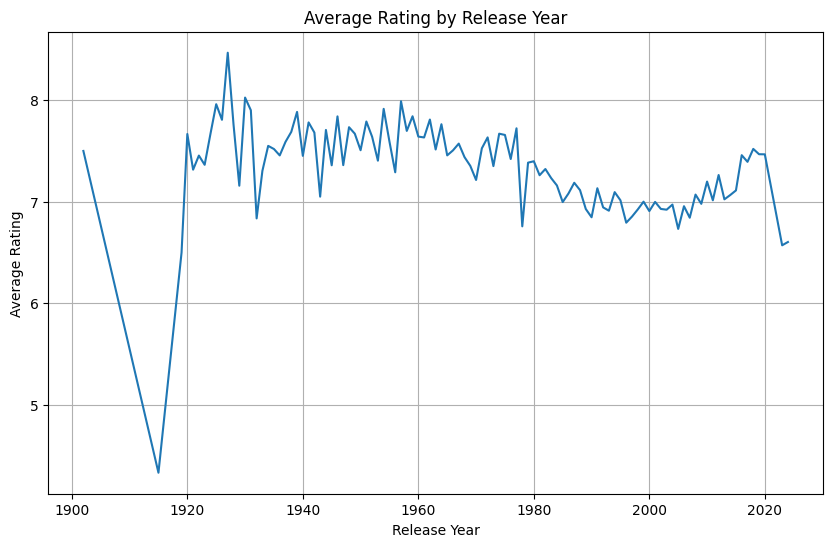

In [103]:
average_rating_by_year = concat_df.groupby('released_year')['rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year, x='released_year', y='rating')
plt.title('Average Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

As we see here on this plot, rating really affected by the release year, the highest rating was for the release year approximately 1925, and the lowest rating was for the release year approximately 1918

#### *Research question 2:* **How the genres affected rating?**

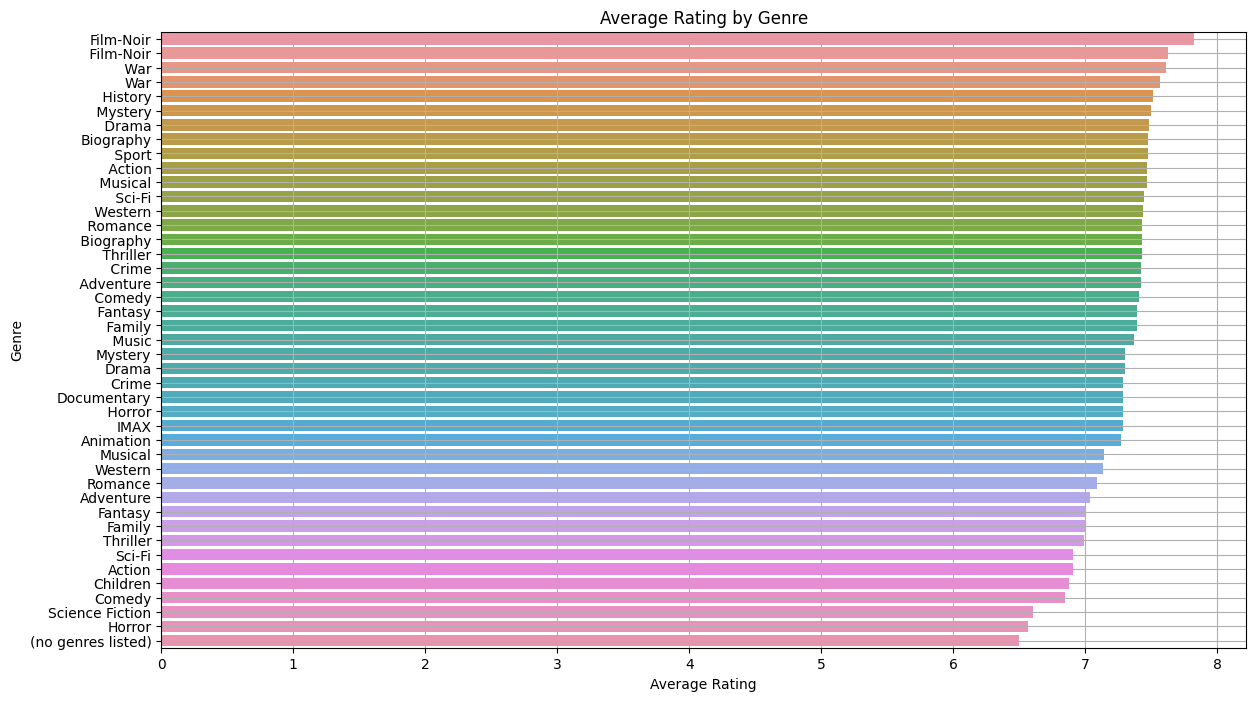

In [104]:
average_rating_by_genre = concat_df.groupby('genres')['rating'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=average_rating_by_genre, x='rating', y='genres', order=average_rating_by_genre.sort_values('rating', ascending=False)['genres'])
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.grid(True)
plt.show()

Yes and here we saw genre affect rating, the most rating genre is 'Film_Noir' and the lowest is 'Horror'.

***
**____________________________________________________________________________________________________________________________**
***

### **5.2:** Reflection

**If I had more time to complete the project using the TMDb, IMDb, and MovieLens datasets, I could explore several avenues:**
* Further Research Questions:

Explore correlations between movie ratings (from IMDb and MovieLens) and popularity metrics (from TMDb).
Investigate trends in genres over time and their impact on audience preferences.
Analyze the impact of movie budgets on their financial success, using revenue and rating metrics.

* Data Quality and Structural Issues:

Ensure data consistency across datasets, especially in terms of data formats .
Address any discrepancies or outliers that might affect analysis.